## Assignment 2: Part 1. SQL

### Directions
- rename this file as `A2_W23_SQL_CUID.ipynb` where CUID Is your Carleton University Identification
- pay attention to where your file is saved as you will need to upload it to Brightspace
- fill in the appropriate command for each instruction statement
- when completed, upload your .ipynb file to Brightspace.
- refer to the chinook database schema below

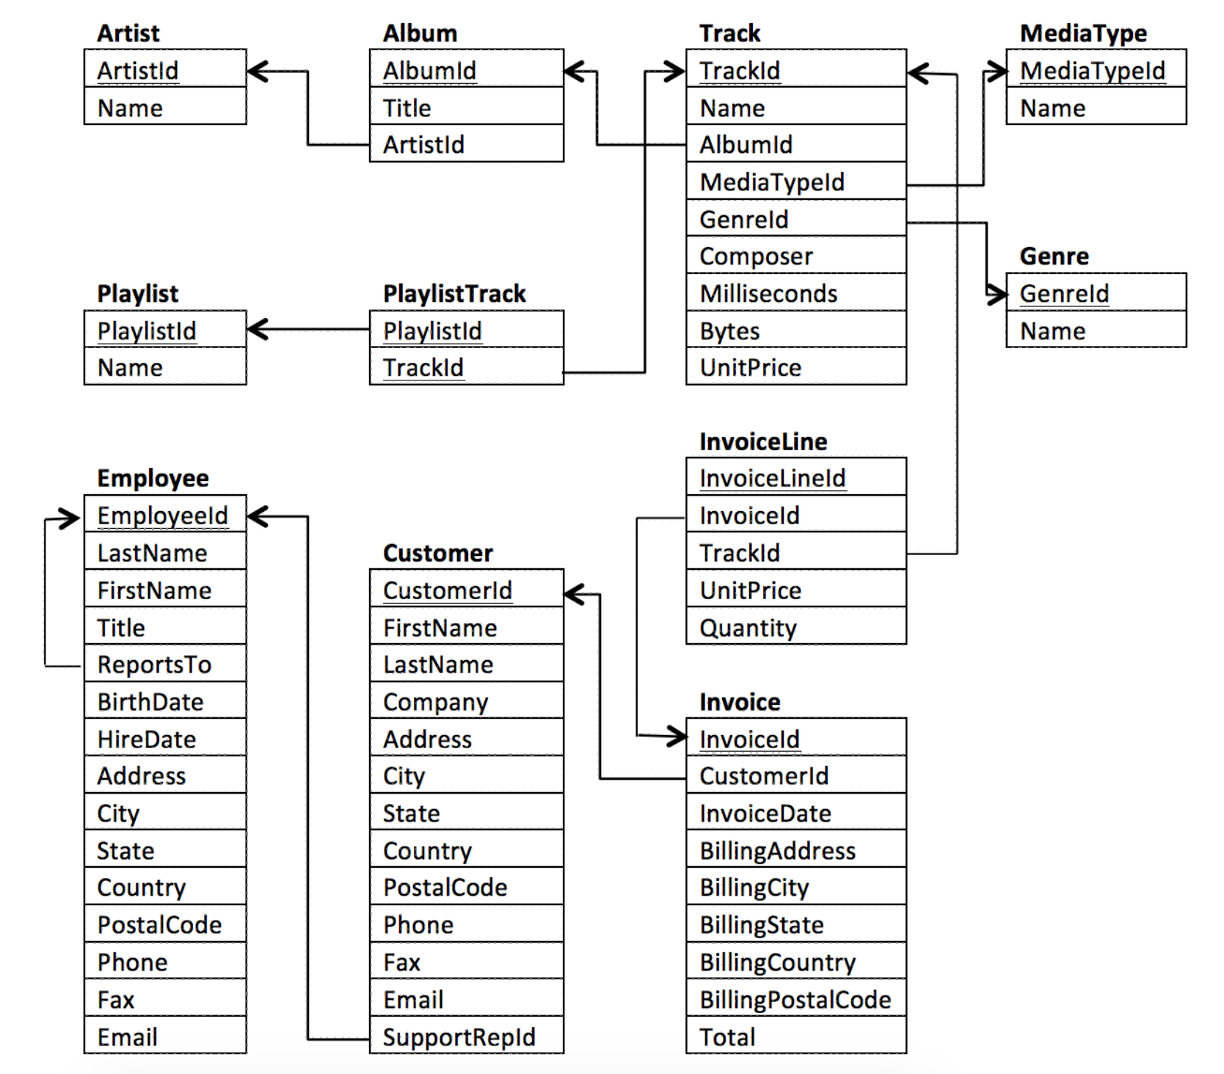


### Please type your name here:
### Please type your student number here:

In [56]:
import sqlite3 as sql3
import pandas as pd

In [57]:
conn=sql3.connect('Chinook.db')  

### 1. **(3pts)** 
### Write an SQL query that returns all the Album `titles` that start with 'S'. 

In [58]:
df1 = pd.read_sql('''
    SELECT Title
    FROM Album
    WHERE Title LIKE 'S%';
''', conn)
df1

,AlbumId,Title,ArtistId
0,22,Sozinho Remix Ao Vivo,16
1,45,Sambas De Enredo 2001,21
2,46,Supernatural,59
3,64,Slaves And Masters,58
4,65,Stormbringer,58
5,110,Seventh Son of a Seventh Son,90
6,111,Somewhere in Time,90
7,115,Sex Machine,91
8,117,Synkronized,92
9,121,Surfing with the Alien (Remastered),95


### 2. **(6 pts)** Write an SQL query that returns all the Genres' names and the number of associated tracks (ie. count up the tracks for each Genre). Name the column that contains the count of genre tracks `NumGenre`. Order the results highest to lowest by `NumGenre`. 

In [87]:
df2 = pd.read_sql('''
    SELECT Genre.Name, COUNT(Track.TrackId) AS NumGenre
    FROM Genre
    INNER JOIN Track ON Genre.GenreId = Track.GenreId
    GROUP BY Genre.Name
    ORDER BY NumGenre DESC;
''', conn)
df2

,Name,NumGenre
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


### 3. **(4 pts)** Write an SQL query that returns all the `Track Names` and `Composers` for the `Bossa Nova` genre. 

In [60]:
df3 = pd.read_sql('''
    SELECT Track.Name AS TrackName, Track.Composer AS Composer
    FROM Track
    INNER JOIN Genre ON Genre.GenreId = Track.GenreId
    WHERE Genre.Name = 'Bossa Nova';
''', conn)
df3

,TrackName,Composer,GenreName
0,Samba Da Bênção,None,Bossa Nova
1,Pot-Pourri N.º 4,None,Bossa Nova
2,Onde Anda Você,None,Bossa Nova
3,Samba Da Volta,None,Bossa Nova
4,Canto De Ossanha,None,Bossa Nova
5,Pot-Pourri N.º 5,None,Bossa Nova
6,Formosa,None,Bossa Nova
7,Como É Duro Trabalhar,None,Bossa Nova
8,Minha Namorada,None,Bossa Nova
9,Por Que Será,None,Bossa Nova


### 4. **(7 pts)** Write an SQL query that returns Genre name and its associated number of tracks (ie. count up the tracks for each Genre) for the genres that have more than 300 tracks associated with it. Name the column that contains the count of genre tracks `NumGenre`. Order the results alphabetically by the Genre Name.

In [139]:
df4 = pd.read_sql('''
    SELECT Genre.Name, COUNT(Track.TrackId) AS NumGenre
    FROM Genre
    INNER JOIN Track ON Genre.GenreId = Track.GenreId
    GROUP BY Genre.Name
    HAVING COUNT(Track.TrackId) > 300
    ORDER BY Genre.Name ASC;
''', conn)
df4

,Name,NumGenre
0,Alternative & Punk,332
1,Latin,579
2,Metal,374
3,Rock,1297


### 5. **(5 pts)** Write an SQL query that returns the `first name`, `last name`, and `Title` of Employees and the `first` and `last names` of their associated Customers.  Display all Employees whether or not they have Customers, except those with a `Title` of `General Manager`. Use the following aliases for the outputted columns: EmpFName, EmpLName, EmpTitle, CustFName, CustLName.  Order the results by EmpLName and then by EmpFName. 


In [272]:
df5 = pd.read_sql('''
    SELECT Employee.FirstName AS EmpFName, Employee.LastName AS EmpLName, Employee.Title AS EmpTitle,
           Customer.FirstName AS CustFName, Customer.LastName AS CustLName
    FROM Employee
    LEFT JOIN Customer ON Employee.EmployeeId = Customer.SupportRepId
    WHERE Employee.Title != 'General Manager'
    ORDER BY EmpLName, EmpFName;
''', conn)
df5

,EmpFName,EmpLName,EmpTitle,CustFName,CustLname
0,Laura,Callahan,IT Staff,Luís,Gonçalves
1,Laura,Callahan,IT Staff,Leonie,Köhler
2,Laura,Callahan,IT Staff,François,Tremblay
3,Laura,Callahan,IT Staff,Bjørn,Hansen
4,Laura,Callahan,IT Staff,František,Wichterlová
...,...,...,...,...,...
408,Jane,Peacock,Sales Support Agent,Mark,Taylor
409,Jane,Peacock,Sales Support Agent,Diego,Gutiérrez
410,Jane,Peacock,Sales Support Agent,Luis,Rojas
411,Jane,Peacock,Sales Support Agent,Manoj,Pareek


### 6. **(5 pts)** Write an SQL query that returns the number of invoices that customer `Rojas` has.  Display the number of invoices in a column named `NumInvoice`. Ensure you display the Customer's last name as well. 

In [275]:
df6 = pd.read_sql('''
    SELECT Customer.LastName, COUNT(Invoice.InvoiceId) AS NumInvoice
    FROM Customer
    INNER JOIN Invoice ON Customer.CustomerId = Invoice.CustomerId
    WHERE Customer.LastName = 'Rojas'
    GROUP BY Customer.LastName;
''', conn)
df6

,LastName,NumInvoice
0,Rojas,57


### 7. **(9 pts)** Write an SQL query that returns the `InvoiceID`, `InvoiceDate`, and `Track Names` for all of customer `Rojas's` invoices. Please include the customer's last name and order the results by the `InvoiceDate` from newest to oldest. 

In [276]:
df7 = pd.read_sql('''
    SELECT Invoice.InvoiceId, Invoice.InvoiceDate, Track.Name AS TrackName, Customer.LastName
    FROM InvoiceLine
    INNER JOIN Invoice ON InvoiceLine.InvoiceId = Invoice.InvoiceId
    INNER JOIN Track ON InvoiceLine.TrackId = Track.TrackId
    INNER JOIN Customer ON Invoice.CustomerId = Customer.CustomerId
    WHERE Customer.LastName = 'Rojas'
    ORDER BY Invoice.InvoiceDate DESC;
''', conn)
df7

,InvoiceId,InvoiceDate,Name,LastName
0,59,2012-10-14 00:00:00,Some Kind Of Monster,Rojas
1,47,2012-02-24 00:00:00,Dancing Days,Rojas
2,45,2011-11-22 00:00:00,Get Up Offa That Thing,Rojas
3,40,2011-08-20 00:00:00,Phantom Of The Opera,Rojas
4,17,2010-01-13 00:00:00,Wherever You May Go,Rojas
5,5,2009-05-15 00:00:00,When My Left Eye Jumps,Rojas
6,5,2009-04-04 00:00:00,Your Time Has Come,Rojas


### 8. **(5 pts)** Write an SQL query that lists out all the `track names` for the `Classical` playlist.  Also return the `Composer` for each track. 

In [277]:
df8 = pd.read_sql('''
    SELECT Track.Name AS TrackName, Track.Composer AS Composer
    FROM Track
    INNER JOIN Genre ON Track.GenreId = Genre.GenreId
    WHERE Genre.Name = 'Classical';
''', conn)
df8

,Name,Composer,Name
0,"Symphony No. 3 in E-flat major, Op. 55, ""Eroic...",Ludwig van Beethoven,Classical
1,Intoitus: Adorate Deum,Anonymous,Classical
2,"Miserere mei, Deus",Gregorio Allegri,Classical
3,Canon and Gigue in D Major: I. Canon,Johann Pachelbel,Classical
4,"Concerto No. 1 in E Major, RV 269 ""Spring"": I....",Antonio Vivaldi,Classical
...,...,...,...
69,"Concerto for Violin, Strings and Continuo in G...",Pietro Antonio Locatelli,Classical
70,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,Classical
71,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,Classical
72,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,Classical


### 9. **(8 pts)** Write an SQL query that calculates the total price for all tracks in the `Classical` playlist. Display the name of playlist, the number of tracks and the playlist price. 

In [278]:
df9 = pd.read_sql('''
    SELECT Genre.Name AS PlaylistName, COUNT(Track.TrackId) AS NumOfTracks, SUM(Track.UnitPrice) AS PlaylistPrice
    FROM Track
    INNER JOIN Genre ON Track.GenreId = Genre.GenreId
    WHERE Genre.Name = 'Classical'
    GROUP BY Genre.Name;
''', conn)
df9

,TotalPrice,Name,NumOfPlaylist
0,73.26,Classical,74


### 10. **(6 pts)** Write an SQL query that returns genre name, track name and media type name for all tracks that are in either the rock or pop genre.  Sort your results by track genre name.  

In [279]:
df10 = pd.read_sql('''
    SELECT Genre.Name AS GenreName, Track.Name AS TrackName, MediaType.Name AS MediaTypeName
    FROM Track
    INNER JOIN Genre ON Track.GenreId = Genre.GenreId
    INNER JOIN MediaType ON Track.MediaTypeId = MediaType.MediaTypeId
    WHERE Genre.Name IN ('Rock', 'Pop')
    ORDER BY Genre.Name;
''', conn)
df10

,Genre,Track,MediaType
0,Pop,"Dig-Dig, Lambe-Lambe (Ao Vivo)",MPEG audio file
1,Pop,Pererê,MPEG audio file
2,Pop,TriboTchan,MPEG audio file
3,Pop,"Tapa Aqui, Descobre Ali",MPEG audio file
4,Pop,Daniela,MPEG audio file
...,...,...,...
1340,Rock,Tease Me Please Me,Protected AAC audio file
1341,Rock,Wind of Change,Protected AAC audio file
1342,Rock,Send Me an Angel,Protected AAC audio file
1343,Rock,I Guess You're Right,AAC audio file
